<a href="https://colab.research.google.com/github/lausted/cl_borrelia_plasmid_plot/blob/main/borreliaplots_MM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Borrelia MM1 Plasmid Plots ##

*Chris Lausted and Chenkai Luo*

*7 Jan 2018*

We can upload a file called `replicons.fna` before running this notebook.  Or in this case, let's download the plasmids of B31(NRZ) and put them into one file. 

* <https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5511922/>
* <https://www.ncbi.nlm.nih.gov/assembly/GCF_002151505.1/>

In [ ]:
%%bash
## Simple function to download fasta and genbank
## <https://www.ncbi.nlm.nih.gov/genome/738?genome_assembly_id=393461> 
dlncbi () {
  ## Download with wget and rename. 
  wget -q -O temp.fna "https://www.ncbi.nlm.nih.gov/search/api/sequence/$1?report=fasta"
  ## Rename the plasmid to start with something like lp or cp. 
  sed -ri "s/^>/>$2 /g" temp.fna
  ## Concatenate all fasta files into one. 
  cat temp.fna >> replicons.fna
}

## Download B31NRZ accessory genome plasmids.
rm replicons.fna
#dlncbi CP031412.1 chr
dlncbi CP031398.1 cp26 
dlncbi CP031408.1 cp32-1
dlncbi CP031410.1 cp32-4
dlncbi CP031411.1 cp32-5
dlncbi CP031405.1 cp32-6
dlncbi CP031407.1 cp32-7
dlncbi CP031406.1 cp32-9
dlncbi CP031399.1 cp9 
dlncbi CP031400.1 lp17
dlncbi CP031401.1 lp25
dlncbi CP031402.1 lp28-3
dlncbi CP031403.1 lp28-4
dlncbi CP031409.1 lp28-8
dlncbi CP031404.1 lp36
dlncbi CP031397.1 lp54

## Preview new file
cat replicons.fna | grep ">" 

>cp26 CP031398.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp26, complete sequence
>cp32-1 CP031408.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp32-1, complete sequence
>cp32-4 CP031410.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp32-4, complete sequence
>cp32-5 CP031411.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp32-5, complete sequence
>cp32-6 CP031405.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp32-6, complete sequence
>cp32-7 CP031407.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp32-7, complete sequence
>cp32-9 CP031406.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp32-9, complete sequence
>cp9 CP031399.1 Borreliella burgdorferi strain MM1 plasmid plsm_cp9, complete sequence
>lp17 CP031400.1 Borreliella burgdorferi strain MM1 plasmid plsm_lp17, complete sequence
>lp25 CP031401.1 Borreliella burgdorferi strain MM1 plasmid plsm_lp25, complete sequence
>lp28-3 CP031402.1 Borreliella burgdorferi strain MM1 plasmid plsm_lp28-3, complete sequ

rm: cannot remove 'replicons.fna': No such file or directory


In [ ]:
%%bash
## Match the replicons in the FASTA file to ParA proteins for identification.

## Create a reference amino acid FASTA file of Borrelia ParA proteins.
## Use Borrelia B31 lp54 A20, A21, A19 and lp21 U04 and cp26 B10. 
## from <https://www.ncbi.nlm.nih.gov/nuccore/AE000790.2>
## and  <https://www.ncbi.nlm.nih.gov/nuccore/AE001582.2>
## and  <https://www.ncbi.nlm.nih.gov/nuccore/AE000792.1> 
cat << 'EOF' > pfam.faa
>32
MDKKETKVITIASIKGGVGKSTTSLIFATLLSIKCKVLLIDIDTQASTTSYFFNKIKDNNIDLINRNIYEVLISNLHIDNALITINKNLDLIPSYLTLHKFNSESIPYKEFKLKEQLKLLSNHYDYIILDTNPSLDFTLTNALVCSNYIIIPITAEKWAVESLDLFTFFMNKLLLTLPMYLINTKFKRNNTHRELLKVLEKNNNFLGTISEREDLNKRIAKNDRFDLTKDYIIEYQNTLTAFLNKSSYVH
>49            
MEIKINKRNLSESVREEEQALVHYNKLKEKLNINFQKEIYCKIEAMKVLKEIKDKEYYKLDNYSSFDDFAKDYRLARTQTYKYLKIATAIEEGLIEEKYVVKNGINDTICLLKTKESPSLKKSNQNPIKPLRFQLKKEEAYSFYKKNPKLTSFLLEKIFFKEKDFLLKIIKEFETLRNKRK
>50
MTALLERLKQKQKELKLDADNKPKAKKGKKATVFSKIEEVKGRKIYHTKIFNDFYTFGISKNEPTKFFISLRGIFNIEDISMFHLFSVREDDEFMGIYYGIRKLDKAFIVKNFNKKETYTLRKCEYIEFRFKKGSVFCYLNGLHILLKKDRVNSPYYNTLLNIILELETELYAFYSKKLSKGGIIPEWIKKRQK
>57
MLISFVKESLPMHKIKTTNNNPRNCYNKVQYKLIVLISTICYLNKTHKKYTQKTILYYFNENLRKNGQTISTLRTMQKYIYRLQKEIKVTTNYYQHMGVNSGTEIYYKLNYPKKDCYHKINQHFKEKKETRFQNRVTNYFNKNSDSKMGSVQCESCNSNKNNIKEERKINEIEKYQVINYFNKCNFSCKEILSILLNLNVDKDTMIKIIKTIKRTDIKAKNKNIYFPKSCSKEKQEKLKKILCNTQKELEKSGYNSEQLETNFQKIYENYKYKPHFIIENHKYSDLSYIKRKLEKSIERKKENSKQDYKNLRTNIFNILIEQLKKETNIEILKPIIKEYLNNQKKIEYKKVFRIYYSELLEIINGKHYSNLKKFRKKSVG
>62
MYQIKTNKMPFNKVVDRRLKIFWVIQKLSANYFISKKKYSLSNVVAMTNSILEKKGFKRVTKRTIQNDIKIFETLGLIKSHFNPLGKNNGSFTYYTINKALEKLAKKIISTAYFIDKKTKHEKSKNKQLKKIKIIEESQKYKISHQITSHVLSNNISKKYKNSKYSFRRKNQNIKKTINFLEKEIKKKSKSINLEEIKKITENDITYKNSLWNLKDFMEELKEYEEKKIIKFYKKNLEKKKQKIWFMAKKFKNTDFDKLIKKFKIKNKMEREKNYENENQIHTSNNIKNAIVLMKTLIKKQKYDKKIKK
EOF

## Other proteins of interest:
## C6:   MKKDDQIAAAIALRGMAKDGKFAVK
## OspC: MKKNTLSAILMTLFLFISCNNSGKDGNASANSADESVKGPNLAEISKKITESNAVVLAVKEVEALLASIDEIGSKAIGKRIQANGLQDLQGQNGSLLAGAYAISNLITQKINVLNGLKNSEELKEKINEAKGCSEKFTKKLSESHADIGIQAATDANAKDAILKTNPTKTKGAEELDKLFKAVENLSKAAKEMLANSVKELTSPVVAESPKKP

## Create an example fasta file with one replicons.
cat << 'EOF' > example.fna
>lp17_B31
GACTCAAAACTTTACCCTTTAAATTGCTAACTTTAACTT ATTAGTCTTTTCATGTAATTTAAGTAATTCTGATCAAAACAAATATTCAATTAACCATTATTACTAACCAAAATGATAATA TTAAATAGAAAAACAAG TTGACGGAAATATTATTATTAATGGGATGACTAAAGAAAGTGGCACAGAAACTAAAAAGC TTTTAGAAATTCCAAATGGGAATATTTCTCGACTTAAAGATGCAATTCAATATGGAGGAA GTTTTAGGGCTAAAGATGTTAGAGAAAATCAAACCCAAAAAGAAAACAACAAAGACTCGC ATATTCATGTCGACAATTTTAAAGAATACATACATTTAATCATGCCTAGCATTAACAATA ATGCTGATAGTAGTAGTAGTTATTACTATACCAACTACATAATAAATGGAGACAATTTGT TAAGAATTATTAGCAACTTATAAAAAATCTTTATAAATTACCAATATTCTTGAAAATTTT AATACTATTTTTTTTATATACTATAATATTATGAAAAAAAATCAAAAAAACAAGTGCTCA GAAATAGAAAAAACACAATTAGAAATAATAAATAACCAATCAGAAATAGAAAAACAACTC CATCAATTAGAAATTGAGTTTACTGGGGTATGCCTGCTTTATGTGACAATACATTATTAA ATCTAGAATTGAATAATTATTCTCAAAAAAACTATTAAAATTTTACAACGAAATTCTTAA AAAAGATAATAAAAATTCTTGCGATCTACCAACAATGAATAAATATCTTGATATATTAGA AAAAACAAAAACCATAGTAAAACTATCTTTTAAAAACCAGTCCAAATATATGATTTATTA TAAAATTAATCCCCCTTAAAGTGTTTCGTTCAACAATACAAGACTACTATCAAACAATAG CAGATAAACTAAAACTACGGTTAGAACTAAACTATCCTACTACTATTTAATCGTAAAAAA TATTTCTTTGCAAATTAAGCAATTTAGAAATATAAATGTAAAGACATATATTTTTATTTG ATAAATAATAAAAATTACTGGGGCACTATTTGGAAAAATTTTTAAAAGAAATATTAAGTA TGAATAGCAAAAATAGGCTATCTTCACACTTAATAATTCTTATTTACACACTAAACAACA TTGACCTAAATTCAAAAAATATTGGATACTATAGTAGGGGCTTTATACGCCGTGCGTTTA CTTTTAACATAGATAGATATTGCAATACTAGTAAAGATATTGAAATAGACATAGACTTAT TAATAAAGTATCTCGATTTTTTAGAAAACAACCTAAAAATTATAACTAATAAATATAAAG TAGAAAAAAATATATTCAAACTTTACTACATAATCAATTATCCTTTAAAAATATGTTACA CAAAAATTATGAACTACTATAAATAGACTATATAATGATATTAAAAAGAGAAACATCTTT AGTATATTACTAAAGGTGTTTCTCCCCTTAATCTAAAGTTGTTTTAAGGTGTATAATGGG GGTGATACCATATTTTAAATTATATATCCCAAATTAATTAAAAAATCAGGTATTGCAAAT GTATTATAGTGTCTCATAGGCCTAATAAAGAACAATTAAAACTAAAAAATATATAAATAA AACGCAAATTAGAAAAAGAAATAACCGTCATAGTCAAACTTTATTTTAAGAAAAATCCTA AATCTATAATTTATTATAAAGTTAATTGCTCCTTAGAAAGAGTTTTATTAAAAATAAAAG ACTACTACGTATTATTCTATGAAGAATTAAAACAATTTTTACAAAAAATCACTACTACTT AATTATAAATACATTATAAAATAAGCTTATGCAAAACTTTAGAAATATATTGTTTTACGC TAAAAAAATTTAAAAAAATACTGTGCTATATTTATAATATAAATTTAATATAATAGGGGG CTAATTCATTATGGATGGAGTAATTAACAATACATTGGCAAGAATAACAAAGCAAATTTA ATTTGCTAAGAATAAGTTAATCATTCTTGTCAAAACACTAGATCATATGAATAAAAAATT ATTCCATAGTGCAAATAAAAATTATGCTTATTCCTTAATAAGAAGCAAGTTTAATAAGGC TCTAGCTAAAACTAATCAACATGAAGTTGATTCTAAAACCCTGTTAGAATATCTTGAAAT ATTAGAAAAAATCCAAAAGTAATCTTCAAATGTTCCACAAATAAAGAAAATGAAAGCTTT AGAGGCCTTTATACACTCCTTTACCCTGTAGAAGGTTGTTGCACTAAAATTTATAATTCT CATCCTAATATGTAAGCTAATATAATCCAGAAAATTATTTTTGCGAAATAGCATAATACT TTAGAGTATTAAAGGCCTAATAAAGAACAATTAAAGCTAAAAATATATACAATTACAAAA CTAATCCTCCATTTTATGATTAAAAATTAATAATATAACGCTCTAAACAAAATAAAACGT AAATTAGGGAAATTAGTATAAATGCGATAAGGGCTTTAAGTAACTTATCTTCCTTAAGCC ACTTAAAGCCCTTTATCTGGTTATCATCCATTTGGAGCACATAATGCTTCCTAATTAATT GTATATTAAATAGAAAATAAAGTCTAGATATATTAATCTAGTAATATTCTAAATTATAAC CAATATAAATATAAATTGATAGTTCTTATTTCTACAAGCTATTTAAATACCAAAAATCTA AAATATACCCCAAAAACCATATTATATTATTTCAATGAAAATCTATAAAAAACGGGCAAA CTATTTCTACACTAAGAACTATGCAAAAGTATATTTATAGACTACAAAAAGAAATAAAAG TCACAACAAATTACTATCAACATATGGGGGTAAATTCGGGTACAGAAATTTATTATAAGC TTAATTATCCTAAAAAAGATTGTTACCATAAGATAAACCAACACTTTAAAGAAAAAAAAG AAAAAAGATTTCAAAATAGAGTTGCCAACTATTTTAATAAAAATTCTGATACAAAAATGG GTAGTGTACAATTGGAGAATTGTAATAATAATATAAAAGAAGAAAGAAAAATTAACGAAA TAGAAAAGTATCAAGTAATAAAGCATTTCAATAAATGTGACTTTTTATGTAAAGAAATTA TTTCAATTTTATTAACATTAAATATTGATAAAGAAAATATGATTAAAATAATAAAAATCC TAAAAATAACTGAAATTAAATCAAAAAATAAAAATATACGCTTTACTAAATCTTGTATTG CTTAAATATTATTTGGGAAAATTTTTATCTACAAAAACAACAGTCTCAGAAATGATGCAG CAACTCTTATTAGACTATCAAAATAATATAAATAACATACAAACAGATGAAAATGCACTT AAATCTCATACAGAAGATATTTGCAATCAAGTCTCAGAAAAAAGAAAAGAAGCAGAAAAA CTAAAAAATGACATATATTCAATATATAGTAGCCTTTAAATTGCATATTGAAATTGTTAT AATACAAAGCCTGTCTTTAATAAAAGATAGGTTTAACATTCTTACTAAAGATTACAAAAA ATTTTTAACCTATAATTTACATAAACTTTAATTCTAATAATAAGTAAACTGATGTTTCTA TAGATCTTTAATTTAATAATATCATTAGTAATAGATTAATATTAGTAATGATATATTCTC TAAAAGAAGTATATTTAAAGGTAATTAATTTTACATTAATTCCCTTTAATAATTTTATTT TTAATAATTGGCGATTACAAACAAAAATTAAAATTGCATAGCAAATTCTTTATGTAAAAG AACCCTTAATAAATCCAATTATGACAATGATTACATTCATTTATTATTAGAATTTGCCTC CAATATTTAACTTTCTAAATTCATCAATAACCCAAAGATAGTAATCTTAAAGATTTAATA AAAAGAAAACCCCTTAAAGATAAGAGGTTTATTTAAAAGAATGTATGGTATGAAGTAAAT ATTGATAATAAATTCTTTTAATTTTAAAAAAGGAGAATATTTAATACTCAATTATTAGTT CAATAATTGAGTATTACCATGTATTTTTAAAATTTTTTTTTAAATTAGATTTTTGCAGAG AAGATCAAATATTATTCAAAGCTAGAATAATGGCTTAAGTAATGCTCATATAAATAAATA AAATATTTTTTCTTATAAATCTTTAAGATTACTATCTTTGGGTTATTGATGAATTTAGAA AGTTAAATATTGGAGGCAAATTCTAATAATAAATGAATGTAATCATTGTCATAATTGGAT TTATTAAGGGTTCTTTTCTACACAGAACAGAAAATAAAGTATTATTTGGATAAAAAAAGA TGAAAGCTTAGAATTTACACATTTATGCCTATATTTATGGCTAATTATAAAAACATAGCA ATAGAAAACTATAAATTAAAGCTATACAAAAAGGAATGTTTAGAAAGAGTATTAATGATT TAGAATTGCATGAAATTGTAAGACAATTATTGTATAGCTATCCAGAATAAAGGAAAAAGC TGTTTTTATAATCCTTGATTTATAAATAGTAGATTATCATCTAACACAAATCTCTGCAAA ATATTGAAAGACATATTCTCTAAAAAATCAACAAAAACTACTTTTATAACTAAAATTTTT ATAAATTTCAGACTTAATCTATAAAAAAGGTTTACTAAAATTATTCAAGACTGCTATCAT ATAATAAGTTGTATAATGAAAAATAAAACTTTTATATTCTTAATATTTTTGATTAAAAAT TTGGCAATATATGCTCAAAATATAAACTATGAATTTAAACAAGCTAAAATTAAAAATCTA AAAGGGATATTTATTAATTATAAAGTCTATCTAGCAGAAAATTTAGCAATTAACAATGTA AAAACCTTAAACCATATTTCTACATTCAAAATCAATCTTGTTATTGACAAAAAAATTGCA ACTTCTATTAAAAATGAGCAAGATGTAATTAGAGCCGGTAATGAATGCGGAATCTTTTTA GAATTTCAAATCAATAACCGCATATACTATACCAAATTTTCATCAATAAAATATATTTTA CAAGCAATTGAGAGTTTTGCTAAAATTAAAAATACAATCAATAATTTAGAAATTAAAAAT CTTGAAGGAAATGGAATTTTTTTATACAAAAATGGTCACTCATACAATTTAAAAACAGAT TTTCAAGAAACAGCAATATTTGTAAATTTTCTTGGCTTTAAAGATAATACTGGAAGACCT TACTTTATATTTTATTACGACAATATAGATGATAAAGATAAAAATTTAAAAACAATCTTA ATTTCCTTTGAAGAATTCCATAATGGAATAAGGGAAGGGCTATTCTTGCTGAGAAATGAA AAAGCGATACTAGAATTTATTAATTTTTCAAAAGATTAGATATTAAAAACATTTTAAAGT CGATATTATAATAAACTAATATCAAAAACCTTGTTTATACTAAACACCCTTAATCTATAT CCTTTTTAACAAATAATTACTTAACTTGGGCTTAAAAATTATTTAAATTTAAGTCAACTG CCACCAAGTAATTTAACTTTTGAATTAAAATCATCCAAAAACTTTTTAAAAGGAATCTTA TTAAAACTTACAATAACATCATTTCTGAACGCATAGATTCTAAATGCTGCTATATTATCA TTTCCCAAGGCAACAAATCTTATAAATTCGCTTTCTGAAATAATAAATTTATAAATTTCT ACCTTAATATTTTTTTCAGTAATCACTGTTGTGTAATCATAAGGAAAATATGAATCATAA AAATCGTTATAATAAACAACACGTTTGCTATCCTCTGAAACCAACTCTCCTTTAGCCTCA AATCTAGTATCTGTTATTATCTTTTCGGGCTTTATTTGACTAGAATTTCTAGATTCAACT CTAACTAAAATAAAATATTCCCTTTTATTTTTCAATTTATCATATTTAATAGAAATTACA GACTTAAATATTCCATCTCTAGAATAATTTACCCCAATATCATATTGTGAATCTAATACT TGAGAAAACCTATCATAAGCTATTTGATAAGTTTGACAAGAAACTAAAAAAAACGCCAAA ATAAAATACTTTAAAATAAATTTTGAATTCATTAAAACCCCCCTTAGTTTATCTTATATT TATTTTAAAAAAATTTCTCAAAAATTAGAAAATTAAATAATATAATTAATTCAAATAAAA ACATTCTAATTTTAGAGCTTGAATTAAAATTAAAAAACTATTATTATTAGGTGTTGTTCT AACAAAAACCAATTTAAAGATTAGATTATATCTAATCCCAATTTATATAAATTTCAAAGT GCATCTATAGGAGAAATCGTGTATACTGACCCAAGGTCAATTATTAATACTTACTTTGTA AAAAACAAAAAAATCTTCATTATCAACCCAATAGCTTTTAAATTTGAACTTAATTTTGAA AAAATTATTCAAACAAATTCAAAAGAGAATATAGCACTTAAAACATTTAAAGGCGGAATT ATTAGTCTACAATTAAGGTCAAATGAACTTTCTAAATTACCACAAGACATTCTAAAGGGA AAACTTGAATTTTATATTAACTATGTAAGTGAAGAAAAACTAAAAATAGTTTATGACATG ATGGTAGTCAAAGTTTACACAATTGACTTAAAAGCTATCAATAAAGATGAAATTTACTTA ATCGAACTTAAAATACTTGGATCTATTTATAGAAAAGAAAATATAGAAAATGCGTTTATT CCTATTATAAAAAATAACAATACTTACCTTTTTGAAAACAAAGCAAACAACCAAAAAGTT AATTTACTATTAAAAGGCATCGATAAGACTATTGAACTTCCGTTTTTAACAAAAATCAGC TATTCAAATATTAAAACTCTTAATACCGCAGATATAAAAACTAATGAAAATTTAAATACG AACACTAAAACAACGAATAGAATGTTGCTAAATCTAAGCACAAAAATCTACGAAGAACTA GTTTTAACAAATTCAAATCAAATAAAAACTATCAACAATAAACAAAAAATTCTAAAAACA TTAAGATCTTTTATTGAGAATGAGAATGGGTTGGGAGGTAAAATAAAGTTAATCTTCTTA GAAAGAACAAATTTTTTGATTAAAAATTTAAACTTAAATGACTTAGACTTTATATTAAAT GACATCAATATTATACAAGAAAATAGCTGTATCAGAATCGATATCACCTTATTAGAAGAT AAAATTGAAAAAAAATACTTAAACCAAGCTTCAAATGTAACCCCATTTCTTAAAAATATC ACATTATTGTAATTTTTTTTTGGAAAGACAAATTACTGCAATCTGCCCAAGCTACATAAT CTAATAAGCTCTTGACAAACACCCTAACAAAAGTATTCAACATATAACCTAACATCCTTG AAACTAACATGCAATATATAATAAAATGAAATTATGAGGTATTTATGTTAAGTATTAACG GTGTAAGACTTTATTCTTTAAAAGAATTCCAAAATATATTAGAAGATTCTTATAATCTTT CAATTAGCAAAAATACTATATCTAAAAAATCAAAAATTTTAAAATGCGCAATCCATGTAG ACAACCGTCCTTACCTTTTAGAAGATTTTTGCACATATTTTCTAATGGACTTTAGAAGAC CCAAACCTATTACAAATAGCATGAAAGAAACAATTCAATTAAGAATTGAACAAGCAAAAA AAATAATGAGCCGAAAATCTACAAAACACGAAATACAAATTGCTTCAAAAAAGATGGGTC ATATTTTATAATCTATCATATTGACATTTTAAAAACATTGCTATAGAATATAGTAAAAAG CTAATTATTTCGTTTGTGATGCAGTAAGAATTTAGAATGCAAGCCAAATAATTGAAAAAG CTTCTGAAACCACAACAAATTTAACTTCAGAAGCCAGGATAAGATAATGATAATAAAAAT AAAAAATAATGTCAATACAAATTTTAATAATCTCATAACATTAGAAGAAATTATAAAGTA CAATCAAAAAAACGCAAGCTCTAATTTAATAGAATTAAAACGCTCAAGGCTAAAATCATA TTTAACTAAAAAAAGAGCCATATACCAACGAATACTCAAAGTATGCTGGGCAATTGACCT TAAAAACAAACAATACTATAAATCTAACAAACTTAAAACATATTCCACAATAGAAATACA TAATATAGTTAATAAATGCCTTGCAAAAGATAATAAAAAAATATCAATCAGGACCTTAGA ATATGATATATCATTTTTAAATCAAATACTCTTAATAAAAACCAAACTAAAACATTTAGG CAAAGATAACGGAAGCTTTGCATTTTATATACAAAACAAAAATCTTTGGAAACACCGCTT TATAATTATTCAGGAAGCAATTAATAAAGAAATAAAAGAATATTTAAAAGATAAAAAAAT AGTATCTGATTTTTTCAAGGAAATCAACAATACTATAAACAAGAATAATATAAGAAATAT AAAACCTAAAAGCTCAATTGCAGATGAATCAATTGCGGATGTTATACCTAAAGGTATAAA AGGTATAAATAAGATAGAGAATTCTATAGAAAAAAATAATGGAAAAATAAATAAAATTTC TTACAAAGAATATATTGCAAACAAGTTAGTAGAAGTTCACAAAATAGAAAAAATGCAAAT AACAAAAATACTTAAAATAAGCAACAATGAAAAAACCTATATAAATGCATTAAGAAACTT AAAGTTGGCAATAGAAAAATATAAGGAAGAATATAAAATTGAAGACATTTCAAATCATTT TATAAAAGAGTTTAAAAATAAGTATAGTAAAAAAATATGGATGATGAATGGAAAAACTGA CAGAACAAATGACTTTTATGAAATTTGGGAAAAAAGATTTAAAAAAACGTTTTTAAATAA AAATTTAAAAAAACAATATAGAAGTAATTATGAAAAAGAAAATAAAAAGATTATTAATAA CGAAAAAAGAGTAAGTATTATTTTTTCTAACAGTAAAGGTTTTAAAAGAATCAGCAAAAT TAAAATTAATCAAAATTAATTGCTATTTACATATATAAAAAGTATTATTATATATAGGCC CTATTCTAAGAATTTTTTTACTTTAGGAACATTTAATATATTTTCTTACAGTTCATATAT ATATATGCATTTCTATTAAAAAGACACTGAAAAACTCATATTTACCAACTAAACTAAAAT TTTTTAAAATCAGATTGTAAACAAAGCATGCTTTTATTTTTCAAAAAAAATCAATCATTT TTTTTGCAAGATATATGAGTTCTATCATAGTAATTTGAAACATTAGATACTCTGGAAGAA TAAAAATGATTTTTATTATTATTCTCATCCAGTTTAATTTGAGAATTTTTAGCCTCAGAC TCTTTTTTGCTTAAACATTGATAATTCAAATTATCCATATATTTCTTTTTAAAATGAGAA GCCCCATCTATCTTGTTTCGATCGTTATTTATTGATAAATCACAACCCAATATTAATAAA AAAGTTAATATTATAAATAATAATGAAATAACAAATTTTCTATTCATAAATTTCTTTCCC CTAAATTTGATTATTAAAATTAACCTTACAAAAACCATAAAGCACAAGTAAACACATTTT AAAAATTTAAAGTTAAGCATTATTGTAGTATATACAGATAATTTGTTTTTCAATATAATA AAATTAGTCCAAATTTATATCCATTTTTAGCATTTTAGCCATTAGAATTATATTCTAAAT TAACCATTTTTTAAAGCAGAATTCGAACAAAATTATATATTCTTATAAAGAAATATAAAC GAATAAGAAATGCAAAAATATTATTTCATAAACCCTAAATAATGCATTAAATTATTATCA TTCTTTTAAATAAAAATTGAAAATTAATTATTGATATTCTAAACCCAAAAGAAATTTTCA AAAGTATTTAGATCTGTAAGATTTTTGTATAGCAAAAGAAAAGTATTGGTGGTTTATGGT GGTATAGAGAGTCGCAAGATAATTATTATATAAATTAAGTTGTTATGGATTTTATTTACA TAAAGCAGATAGATGTTTCCTATTAAGTAAACTATGTAGTAATTATGGTATTAAAAATAC AACTCTAAAATTAAGAGAAACCAGTTGGCCTTTTGGCAGTTGTAGTTCTAAGTGATAGAA ATCTAAATTCAAATCCAAATCTTAAGTCTTATTTATAAAGAAATAAAAGCTAAGACAGGA GCTGCCTTAAGTAAGGCTAGATCATGTATTGGTAAATACTGTTCTTTTAAATAGTTTAGA AAGCTGCCATGAAATAAATCGAGGATTTGTTTCTATAATCTTTGATTTAGAAATAGTAAT TTAAATCTTAAAGCATTGTTAAAATTTTATATTCACAATGCAAATTTTTAGTTAATTTAT GTTTTTTAGATTTTCATTTTTCTTATTTGCTATAAACTTATTAATTTAGGCACCAAATAT TTTAGTTTTTATTTTTTTAAAAAAGAAGTCCCTACCCCCGATCTTATTTGGAGAGGATTA ATAGGGGTGTTGGGGACTATTGGTAGATCGTTTTCTACCTTACATATATAATATTTTATT TTTTTAATTTTGTAAATATTATTTAATAATAATAAATAAAATTAAACGCTTTTAAGTAAA ATGTTAAATTTTGGTTTTTTCCCCATGATTTCCTTTTAATTTTTTAGTTTTGCTATTTGA TTTAGTAGCCTGTTGTTGTGATTGATCTTCAATTTTATTGATGGCTTGTAAAAGCCTTAT TTGGCCGTTATTAAGGTTTTTTTTTCTATGTTTGAGTTTTAAAGGATTTAATTTTTGATT CATTATTTGAATTTCTTTAATTTCTTCTGCAGTTGGTTCATAATTTATCCATTTTTTATC TATCCAGCCTTTTTCCCATTCATAATAGCTTTCATTAAAGTTGGTTTTGTTTTGTTCGTC GAAGTGCCTTGCTAGTGCGGCAATTATTTTTGTTCCATATTTAAGCATTTTTTCTGTGTC TGTTTTGGTAATAAATGTGTCATAATCGTAATTTTCACCGGTTTGCATATTAACAATATC AACTATAAGCTTGAAAGTATTTATGCAATTCATTGCAATATTTGTGGATGAAAAATTAGG ATCACTAAGGGCTTTAATATTAAGTTCATATTTTTTCTTTAAACTTATGGGAATTTTAAA AAAGTCAATTATAAAGCCATTTATTTTTGCTCGATAATTAGCTTCATATTGAGAATTTCC AAAGAAAGTTCCTTTTATGCCCCCAATTGTATATTCATTATAGTTTATTGTTATTTCTTT TTGCATTTTTATCCTTTAAAAATATATTAATATAATATAATACTATGTATTAATTGATAT TATATATCAATTAATACATAGTATAAATAAAAAAAATATTTTTAATTTTGTTTTTTTTCT AAACTGTTGTAGATTTTAACTTATCTTTAACCTTTAACCATTTATAAAAAGTCCTTAAGA GAGAAATTTCTTAGGACTTTTTATAAATTTAATAAAGAATAATGAAGAATTGCCCGCCTA AATTTCAAAATAAATTTGGGCGGGGGGTAGGTTTGTAAAATAGATTTATTTTTAGCTCTG AATATACTTTTTATGATATCGGTAGAGGCTTCTAATATAGATAAGACAATAGCTTAGGTG CCGTTTTTAGATTATTAATTAATTTAGAAGGTTAAATATTGTAAGTAAATTCTGGTGATA AATGAATTTTATTTTTATCATAATTTAAATTTTTTTAATAAAAGTTCTTTTTTCTATAAA GAACATAAAATAAGTATTATTTGGCAAAGAGAAGGTTGGCATTTATAAGTACAGAATATA TTTTAACACCAACCAAAAGAAATACTTTTTAAAAGTATTTAGATGTGTAGGATTTTTATA TAATACAGTGTTAAAGCGGCAAGATAGATTTTTATTAAAAAAAATAAGCAAAATCTTATT ACTTGTTCAAATAAATATAAATAAGAGCTTCTATTGCTAAAAAAAGTTTATAGTTTGGCC TTTTGTATGCATGGATTGACTTAAGCTCTATATATAAATTCTTTTAGAGAAATTTAAAGA GGGATAGAACACAAGGATTTCTTAAACATAAGAGCAAGAAAAATAAGCAAGCTTTTAAAG CTAATAATAAAAAAACAACGAAAATAAACTTAAAGAATACTAAAAAAATTATCAAAAAAA CAAAAAACTTCTATTAATGGAGCTAAATCTATATTAAGAATTACTAAGTTACATGAGAAA ATTGTAAATCAAAAAACCTTTTTACACAAGGTATTTTTTGCTTTATAGTTATTTATAAAA ATATAGCAATAGAGAACTTATTAATTAAAGATATGTGAATGTTTGGGTAAAGTATTAATA ATTTAGGATGTTATAAACTTGTAAGACGATTATAGTATAAATCAGAATGGTATGGATCCT TTTTGTATAAAGTAGGTATATATTTTTCATCAAGCAAGCTATTTGTAATTGTGGTGTTAA AAATACAATTCTAAAATTAAGTGGTGCTAGGTAAACTTACAGCGTTTTGTATAATAAAGA TATAAATGCAATTCTAAATCTTAAGTTTTATTGCTATAAAGAAATAAAAGCTAAGACAGG AATTTTCCGAATTTAGGCTTGTTAATCATGCTATTGGTGTGAAAATAAGATATAAAAAGA ACTAAAAAGTTATCGTAGAATGAGACAAAAGCCGTGAATATAGAGATAGTAGTTTGCTAG CTTTTAAGGCCACATCAGATCTAATTCATTAAAAAATTTTGTGAAAGGGGCTTCATAGGT AGAGATTAAAGTAATTAATATGTGATATAAAATAATTAATATGTGATATAAAATAATTAA TATGTGATATAAAATAATTAATATGTGATATAAAATAATTAATATGTGATATAAAATAAT TAATATGTGATATAAAATAATTAATATGTGATATAAAATAATTAATATGTGATATAAAAT AATTAAAAGGAAGTTTGTATGAAAAAAATAGCATTTCATATTCAAAAAGGTGGTGTTGGG AAAACTACCTTAAGCGGAAATATTGCAAGTTATTTATCTAAAACAAAAAAAGTTATATTA GTTGATTGTGATATACAGCAAGCAAGTTCTTCTACATGGTTTCTTAATCATGAAATTCTT AAGCTGGATATTAAAGATTTTCTTTTGAAGAAGATGGATGTAGATCAAGTAGTAAGACAA ATACAAAAAAATTTTTATATTTTGCCATGTGTGCCGAGTGGAACTTTTAGAAGAGATGTG CAACATGAATTGCAAGATTTTCCATATTTGATAGATGATTTTTGTTTGGAATTGGAGAAA TTGGGATTTGAATTTGCAATTTTTGATTTATCTCCCAGTTTTGAGCTTTGGGAGCGAAGA ATTATTCTTGCAATGTGTGAAGTTATTACTCCACTGACCCCAGAATTTTTAAGCCTTGAA GGAATTAATATTTTTAAAGAAGAGTTTGAGTCTTTGTTAAAATCTTATAGAAAAAAGGTT AAACATGAGAAGATTATTTGCAATATGCTTAATAAAAGTTTTAAAAGACATAATTTGCAT CTAAGGCAATTTAAAACTTTTGGATATGATCTTTATGAGGTTGGACAAGATGCTAAAATA GCAGAATCTCAGCTATATAAGAAGTCGATTTTTGATTATTATCCGGAGAGTAGATCTGTC TTAGAACTTTCAAGATTGGGAGATGCTTTATGCCTATAAGCAAAGAGGTTAATTTAGAAG AAATTATTAAACAAAATGTTAGCAAATCTAAATTTGCTTTTCGTGATAATGATGTTATTA GCAATAACATTCCAAATGTTAAGCCTATTAGATCAAAAATGACGATCAAGCAAATAAGTG TAGGACTGAAATATGAATATTGGATTGAATTTTATTCTATTTTAGACAAAAAGGGATTAA CAGCTTCTGGTTTTATAAGAACTTTAATTATGGAATATATAGAAGCTTCTAAAAAATAAT AATTTTGTTATTTAAATTTTTAACAAAAAAATAATAAAGAATTATCTACCTATGATTTCT GTGAAATTTAGGTAGATATGAATTTGTTAGTAAATGGATTTATTTTGATTCCGAATATGC TTTTTGATCATATCGGAAAAACTTTCTCTCTAGTATAAATAAGTCAGTAGTTTTTAGATT AAAAATAAGATTTTCAGCAATGCATAAATAATTAGAATATTTTTTCTTATAAGCTTTGAT GAAGATATTGTATTAAATTATTGATGAATTTAGAAGATTGAATATTGGCAATGTGATCTT TATTGCAATTTAATTCATTAATGGTTATTTTCCATAAGGAATATAAAAGTATTATTTTGT GAGACAGGGCATAAGCTCATCATTTGTGTCTATGGTTAGTAACTAGTACTCGGGGGGGGG GGATAATTAACTAAATATATGCAGTGATTATTAAAAGCTATCTCATTTCTATATACACTA AGTAATTATTATAAAATAATAGAGTATATAAGTGCCGATAAAGTTTGTAAAAACAGAATA TATTCTAACACTAATCAAAAAAATTTTTAAAAGTATTTAGATTTGTAAGATTTTTGTATG ACAAAATGTTAAGTGATAGGAAAGATTCTTATAAAAAAACAAGAAAAGTTTTAGCATTAA TCTAGGCAAATATAAAAATAAATTTTCACTCTTAAAGGAGATTAATACTTTAACTCTTTT TTGTGCATGGATTGATTAAAGCCTCGCAGATAATAATTTTTTAGATAAATTAAAAAGGGA AGCAAAACGTAAGGATTTCCTAAATATAAAATGAAAAACCCAATAAGAATAGAAAATGAA TATAAAGCTTATCTAAAATAGGATTTGTAAAGTTATGTCTACATAGGATCATTATAATAA TAAAGTTATTAAAAATTTAGTAGTAGAAAAAATACCGATAATAAATATTATATTTCAGTA GTAGTTGAGAGCTTAAATATTAAAAATAACAATAAAAAAAATAATAAAAAAGAGTCGTGA AAGTAAAAAAACAATCATTCTAAATATTTATAAAAAATAAAAGTAAACTTAAAAATACTG GAAGAAAACTATTAAAAAGACAAAGGGCGCTATTAATAGAGCTAAATCTAGATTAAGGGT TGCTAATTTGTATAAGAAAAGTTTAAATTAAATTCAAAGAAAAGACTTTTTATGTAAATT GTCTTATTACTTTTTAGTCAATTATAAAAACATAATGATAGGGAATTTAATCAATTAATT TTATACAAAAAGGAATGTTTTAGTAAAGTTTCAATATGTATGATAGAGATTTAAATGCAA TTTTAAATCTTAAGACTTTCTTTTTATAAAGAAATAAAAAACCAAGGTAAGAACTTCCTA AAGTAAGGTTTGGGGGATTATGTTTTGGCGGATGGCCGGTCTTAATAAAAAATAATTTAA AAAGTTATCATATGAGATGAAGCAATAAGTTATTTTAATGATCTTTGATTTAGAAATAGT AGTTAGCTTGTTGGATACATTTGGCTTAATTACAATCAATACAATAAGTTAAATCATTGT ATTGATTGTAATTAAAGCTATTGATATTATAATAAATATATAAAACTTATTATTAATAAT TAATAGATAAAAAATTAATTTTAACATTTCTATTAATAATAAAAAAATATCAAAACATTT TTTACAAAATCTGATTAATTTTGTGAAAAATGTTTTTAGTTGCAAGTGAAAATATATTAC ACACATAGTCAAGCATGAATACACGATTATTGCTGTCATAAAAATTTTAATTCTCCTTCA ATTTTAGTCTATCTCAATTTTTAAAAAATTCCATTTTTGTTTATCGATAGTTCTGTAGCA TTTATATAAATGCATGTTATAATTTTAATATTTGAGAGTGTTTTTAAATGCCTTTTTAAC TATGTTATTTTTTTGAAAAATTTCCACACAAAAAATTTTTTTGTTTCCTCTTTTTTACTT ATCTTGTTACATTTAATGGGCATTCTTTTTTTCTCTTCTAGGCTTTGAATTAAAAATAAT AAGTATATTATCTATATAATCTTTATTTAATGTTTTAAATAAATTATATTGATCCAGATT TAAGACATAGTTAGGATTTGTTTTTTTAAAATTTTAAAATAATAAGATTTGCTAGGCAAT ATTATTGGATTTTTATATATTTGATTGCAAGCTCTTCAAACGTTATGGCATTTTGACCAA TTTTAATAGATTGCACTTGAGAAAATATTTGTTAGGGTTGTTACTTTTTAAAAGTTTGGT GTTATAAAATATTTTCAAATTTTTTCTTTTGGGGGGATGTAAATTAATACTTTTTCCCTC ATACTTTTTGAAAGTTTTTATATTTTTTGATGGTTTATAGGAAATAATTTTCCCTGTTTT TCTAATCCAAGTAATTTTATATAAACGGCATTTATATATTTTTCTTTTGTATATTTCGTA GTATATAGCTATTATAAGTAA
>lp17_B31_dup
GACTCAAAACTTTACCCGTTAAATTGCTAACTTTAACTTCAAAATACTCAACTTTAACCC GAAATGATAAAACTTTGTTTCGCCGTACGATTAGA ATAATCGTTGATCAGGTTTATTGATTATCAATAAACCTGATCTATAATATTATAAGCGGT TTTTGCAAGTTTAATAGGAGCTATAATATCCATGAACAAATTATTGATATTCATTATTTT ATTAGTCTTTTCATGTAATTTAAGTAATTCTGATCAAAATAATCCACTAAACATGTCAAA ACAAATATTCAATTTTCAA ACGAAATTCAAGCGTTAAA AAAATAGAAAAACAAG TTGACGGAAATATTATTATTAATGGGATGACTAAAGAAAGTGGCACAGAAACGATGTTAGAGAAAATCAAACCCAAAAAGAAAACAACAAAGACTCGC ATGCTGATAGTAGTAGTAGTTATTACTATACCAACTACATAATAAATGGAGACAATTTGT TAAGAATTATTAGCAACTTATAAAAAATCTTTATAAATTACCAATATTCTTGAAAATTTT AATACTATTTTTTTTATATACTATAATATTATGAAAAAAAATCAAAAAAACAAGTGCTCA GAAATAGAAAAAACACAATTAGAAATAATAAATAACCAATCAGAAATAGAAAAACAACTC CATCAATTAGAAATTGAGTTTACTGGGGTATGCCTGCTTTATGTGACAATACATTATTAA ATCTAGAATTGAATAATTATTCTCAAAAAAACTATTAAAATTTTACAACGAAATTCTTAA AAAAGATAATAAAAATTCTTGCGATCTACCAACAATGAATAAATATCTTGATATATTAGA AAAAACAAAAACCATAGTAAAACTATCTTTTAAAAACCAGTCCAAATATATGATTTATTA TAAAATTAATCCCCCTTAAAGTGTTTCGTTCAACAATACAAGACTACTATCAAACAATAG CAGATAAACTAAAACTACGGTTAGAACTAAACTATCCTACTACTATTTAATCGTAAAAAA TATTTCTTTGCAAATTAAGCAATTTAGAAATATAAATGTAAAGACATATATTTTTATTTG ATAAATAATAAAAATTACTGGGGCACTATTTGGAAAAATTTTTAAAAGAAATATTAAGTA TGAATAGCAAAAATAGGCTATCTTCACACTTAATAATTCTTATTTACACACTAAACAACA TTGACCTAAATTCAAAAAATATTGGATACTATAGTAGGGGCTTTATACGCCGTGCGTTTA CTTTTAACATAGATAGATATTGCAATACTAGTAAAGATATTGAAATAGACATAGACTTAT TAATAAAGTATCTCGATTTTTTAGAAAACAACCTAAAAATTATAACTAATAAATATAAAG TAGAAAAAAATATATTCAAACTTTACTACATAATCAATTATCCTTTAAAAATATGTTACA CAAAAATTATGAACTACTATAAATAGACTATATAATGATATTAAAAAGAGAAACATCTTT AGTATATTACTAAAGGTGTTTCTCCCCTTAATCTAAAGTTGTTTTAAGGTGTATAATGGG GGTGATACCATATTTTAAATTATATATCCCAAATTAATTAAAAAATCAGGTATTGCAAAT GTATTATAGTGTCTCATAGGCCTAATAAAGAACAATTAAAACTAAAAAATATATAAATAA AACGCAAATTAGAAAAAGAAATAACCGTCATAGTCAAACTTTATTTTAAGAAAAATCCTA AATCTATAATTTATTATAAAGTTAATTGCTCCTTAGAAAGAGTTTTATTAAAAATAAAAG ACTACTACGTATTATTCTATGAAGAATTAAAACAATTTTTACAAAAAATCACTACTACTT AATTATAAATACATTATAAAATAAGCTTATGCAAAACTTTAGAAATATATTGTTTTACGC TAAAAAAATTTAAAAAAATACTGTGCTATATTTATAATATAAATTTAATATAATAGGGGG CTAATTCATTATGGATGGAGTAATTAACAATACATTGGCAAGAATAACAAAGCAAATTTA ATTTGCTAAGAATAAGTTAATCATTCTTGTCAAAACACTAGATCATATGAATAAAAAATT ATTCCATAGTGCAAATAAAAATTATGCTTATTCCTTAATAAGAAGCAAGTTTAATAAGGC TCTAGCTAAAACTAATCAACATGAAGTTGATTCTAAAACCCTGTTAGAATATCTTGAAAT ATTAGAAAAAATCCAAAAGTAATCTTCAAATGTTCCACAAATAAAGAAAATGAAAGCTTT AGAGGCCTTTATACACTCCTTTACCCTGTAGAAGGTTGTTGCACTAAAATTTATAATTCT CATCCTAATATGTAAGCTAATATAATCCAGAAAATTATTTTTGCGAAATAGCATAATACT TTAGAGTATTAAAGGCCTAATAAAGAACAATTAAAGCTAAAAATATATACAATTACAAAA CTAATCCTCCATTTTATGATTAAAAATTAATAATATAACGCTCTAAACAAAATAAAACGT AAATTAGGGAAATTAGTATAAATGCGATAAGGGCTTTAAGTAACTTATCTTCCTTAAGCC ACTTAAAGCCCTTTATCTGGTTATCATCCATTTGGAGCACATAATGCTTCCTAATTAATT GTATATTAAATAGAAAATAAAGTCTAGATATATTAATCTAGTAATATTCTAAATTATAAC CAATATAAATATAAATTGATAGTTCTTATTTCTACAAGCTATTTAAATACCAAAAATCTA AAATATACCCCAAAAACCATATTATATTATTTCAATGAAAATCTATAAAAAACGGGCAAA CTATTTCTACACTAAGAACTATGCAAAAGTATATTTATAGACTACAAAAAGAAATAAAAG TCACAACAAATTACTATCAACATATGGGGGTAAATTCGGGTACAGAAATTTATTATAAGC TTAATTATCCTAAAAAAGATTGTTACCATAAGATAAACCAACACTTTAAAGAAAAAAAAG AAAAAAGATTTCAAAATAGAGTTGCCAACTAT GTAGTGTACAATTG TAGA TTTCAATTTTATTA TA CTTAAAT CA A CTAA AATAC AT T T TT AA C AAAAGAAA ATTG CA AAGATCAAATATTATTCAAAGCTAGAATAATGGCTTAAGTAATGCTCATATAAATAAATA AAATATTTTTTCTTATAAATCTTTAAGATTACTATCTTTGGGTTATTGATGAATTTAGAA AGTTAAATATTGGAGGCAAATTCTAATAATAAATGAATGTAATCATTGTCATAATTGGAT TTATTAAGGGTTCTTTTCTACACAGAACAGAAAATAAAGTATTATTTGGATAAAAAAAGA TGAAAGCTTAGAATTTACACATTTATGCCTATATTTATGGCTAATTATAAAAACATAGCA ATAGAAAACTATAAATTAAAGCTATACAAAAAGGAATGTTTAGAAAGAGTATTAATGATT TAGAATTGCATGAAATTGTAAGACAATTATTGTATAGCTATCCAGAATAAAGGAAAAAGC TGTTTTTATAATCCTTGATTTATAAATAGT ATATTGAAAGACATATTC ATAAATTTCA ATAATAAGTTGTAT TTGGCAATATAT AAAGGGAT AAAACCT ACTTCTATTA GA CAAGCAATTGAGAGTTTTGCTAAAATTAAAAATACAATCAATAATTTAGAAATTAAAAAT CTTGAAGGAAATGGAATTTTTTTATACAAAAATGGTCACTCATACAATTTAAAAACAGAT TTTCAAGAAACAGCAATATTTGTAAATTTTCTTGGCTTTAAAGATAATACTGGAAGACCT TACTTTATATTTTATTACGACAATATAGATGATAAAGATAAAAATTTAAAAACAATCTTA ATTTCCTTTGAAGAATTCCATAATGGAATAAGGGAAGGGCTATTCTTGCTGAGAAATGAA AAAGCGATACTAGAATTTATTAATTTTTCAAAAGATTAGATATTAAAAACATTTTAAAGT CGATATTATAATAAACTAATATCAAAAACCTTGTTTATACTAAACACCCTTAATCTATAT CCTTTTTAACAAATAATTACTTAACTTGGGCTTAAAAATTATTTAAATTTAAGTCAACTG CCACCAAGTAATTTAACTTTTGAATTAAAATCATCCAAAAACTTTTTAAAAGGAATCTTA TTAAAACTTACAATAACATCATTTCTGAACGCATAGATTCTAAATGCTGCTATATTATCA TTTCCCAAGGCAACAAATCTTATAAATTCGCTTTCTGAAATAATAAATTTATAAATTTCT ACCTTAATATTTTTTTCAGTAATCACTGTTGTGTAATCATAAGGAAAATATGAATCATAA AAATCGTTATAATAAACAACACGTTTGCTATCCTCTGAAACCAACTCTCCTTTAGCCTCA AATCTAGTATCTGTTATTATCTTTTCGGGCTTTATTTGACTAGAATTTCTAGATTCAACT CTAACTAAAATAAAATATTCCCTTTTATTTTTCAATTTATCATATTTAATAGAAATTACA GACTTAAATATTCCATCTCTAGAATAATTTACCCCAATATCATATTGTGAATCTAATACT TGAGAAAACCTATCATAAGCTATTTGATAAGTTTGACAAGAAACTAAAAAAAACGCCAAA ATAAAATACTTTAAAATAAATTTTGAATTCATTAAAACCCCCCTTAGTTTATCTTATATT TATTTTAAAAAAATTTCTCAAAAATTAGAAAATTAAATAATATAATTAATTCAAATAAAA ACATTCTAATTTTAGAGCTTGAATTAAAATTAAAAAACTATTATTATTAGGTGTTGTTCT AACAAAAACCAATTTAAAGATTAGATTATATCTAATCCCAATTTATATAAATTTCAAAGT GCATCTATA AAACTTGAATTTTATATTAACTATG CCTATTAT GTTTTAACAAATTCAAATCAAATAAAAACTATCAACAATAAACAAAAAATTCTAAAAACA TTAAGATCTTTTATTGAGAATGAGAATGGGTTGGGAGGTAAAATAAAGTTAATCTTCTTA GAAAGAACAAAGAAAATAGCTGTATCAGAATCGATATCACCTTATTAGAAGAT AAAATTGAAAAAAAATACTTAAACTAACCCCATTTCTTAAAAATATC ACATTATTGTAATTTTTTTTTGGAAAGACAAATTACTGCAATCTGCCCAAGCTACATAAT CTAATAAGCTCTTGACAAACACCCTAACAAAAGTATTCAACATATAACCTAACATCCTTG AAACTAACATGCAATATATAATAAAATGAAATTATGAGGTATTTATGTTAAGTATTAACG GTGTAAGACTTTATTCTTTAAAAGAATTCCAAAATATATTAGAAGATTCTTATAATCTTT CAATTAGCAAAAATACTATATCTAAAAAATCAAAAATTTTAAAATGCGCAATCCATGTAG ACAACCGTCCTTACCTTTTAGAAGATTTTTGCACATATTTTCTAATGGACTTTAGAAGAC CCAAACCTATTACAAATAGCATGAAAGAAACAATTCAATTAAGAATTGAACAAGCAAAAA AAATAATGAGCCGAAAATCTACAAAACACGAAATACAAATTGCTTCAAAAAAGATGGGTC ATATTTTATAATCTATCATATTGACATTTTAAAAACATTGCTATAGAATATAGTAAAAAG CTAATTATTTCGTTTGTGATGCAGTAAGAATTTAGAATGCAAGCCAAATAATTGAAAAAG CTTCTGAAACCACAACAAATTTAACTTCAGAAGCCAGGATAAGATAATGATAATAAAAAT AAAAAATAATGTCAATACAAATTTTAATAATCTCATAACATTAGAAGAAATTATAAAGTA CAATCAAAAAAACGCAAGCTCTAATTTAATAGAATTAAAACGCTCAAGGCTAAAATCATA TTTAACTAAAAAAAGAGCCATATACCAACGAATACTCAAAGTATGCTGGGCAATTGACCT TAAAAACAAACAATACTATAAATCTAACAAACTTAAAACATATTCCACAATAGAAATACA TAATATAGTTAATAAATGCCTTGCAAAAGATAATAAAAAAATATCAATCAGGACCTTAGA ATATGATATATCATTTTTAAATCAAATACTCTTAATAAAAACCAAACTAAAACATTTAGG CAAAGATAACGGAAGCTTTGCATTTTATATACAAAACAAAAATCTTTGGAAACACCGCTT TATAATTATTCAGGAAGCAATTAATAAAGAAATAAAAGAATATTTAAAAGATAAAAAAAT AGTATCTGATTTTTTCAAGGAAATCAACAATACTATAAACAAGAATAATATAAGAAATAT AAAACCTAAAAGCTCAATTGCAGATGAATCAATTGCGGATGTTATACCTAAAGGTATAAA AGGTATAAATAAGATAGAGAATTCTATAGAAAAAAATAATGGAAAAATAAATAAAATTTC TTACAAAGAATATATTGCAAACAAGTTAGTAGAAGTTCACAAAATAGAAAAAATGCAAAT AACAAAAATACTTAAAATAAGCAACAATGAAAAAACCTATATAAATGCATTAAGAAACTT AAAGTTGGCAATAGAAAAATATAAGGAAGAATATAAAATTGAAGACATTTCAAATCATTT TATAAAAGAGTTTAAAAATAAGTATAGTAAAAAAATATGGATGATGAATGGAAAAACTGA CAGAACAAATGACTTTTATGAAATTTGGGAAAAAAGATTTAAAAAAACGTTTTTAAATAA AAATTTAAAAAAACAATATAGAAGTAATTATGAAAAAGAAAATAAAAAGATTATTAATAA CGAAAAAAGAGTAAGTATTATTTTTTCTAACAGTAAAGGTTTTAAAAGAATCAGCAAAAT TAAAATTAATCAAAATTAATTGCTATTTACATATATAAAAAGTATTATTATATATAGGCC CTATTCTAAGAATTTTTTTACTTTAGGAACATTTAATATATTTTCTTACAGTTCATATAT ATATATGCATTTCTATTAAAAAGACACTGAAAAACTCATATTTACCAACTAAACTAAAAT TTTTTAAAATCAGATTGTAAACAAAGCATGCTTTTATTTTTCAAAAAAAATCAATCATTT TTTTTGCAAGATATATGAGTTCTATCATAGTAATTTGAAACATTAGATACTCTGGAAGAA TAAAAATGATTTTTATTATTATTCTCATCCAGTTTAATTTGAGAATTTTTAGCCTCAGAC TCTTTTTTGCTTAAACATTGATAATTCAAATTATCCATATATTTCTTTTTAAAATGAGAA GCCCCATCTATCTTGTTTCGATCGTTATTTATTGATAAATCACAACCCAATATTAATAAA AAAGTTAATATTATAAATAATAATGAAATAACAAATTTTCTATTCATAAATTTCTTTCCC CTAAATTTGATTATTAAAATTAACCTTACAAAAACCATAAAGCACAAGTAAACACATTTT AAAAATTTAAAGTTAAGCATTATTGTAGTATATACAGATAATTTGTTTTTCAATATAATA AAATTAGTCCAAATTTATATCCATTTTTAGCATTTTAGCCATTAGAATTATATTCTAAAT TAACCATTTTTTAAAGCAGAATTCGAACAAAATTATATATTCTTATAAAGAAATATAAAC GAATAAGAAATGCAAAAATATTATTTCATAAACCCTAAATAATGCATTAAATTATTATCA TTCTTTTAAATAAAAATTGAAAATTAATTATTGATATTCTAAACCCAAAAGAAATTTTCA AAAGTATTTAGATCTGTAAGATTTTTGTATAGCAAAAGAAAAGTATTGGTGGTTTATGGT GGTATAGAGAGTCGCAAGATAATTATTATATAAATTAAGTTGTTATGGATTTTATTTACA TAAAGCAGATAGATGTTTCCTATTAAGTAAACTATGTAGTAATTATGGTATTAAAAATAC AACTCTAAAATTAAGAGAAACCAGTTGGCCTTTTGGCAGTTGTAGTTCTAAGTGATAGAA ATCTAAATTCAAATCCAAATCTTAAGTCTTATTTTAAGGCTAGATCATGTATTGGTAAATACTGTTCTTTTAAATAGTTTAGA AAGCTGCCATGAAATAAATCGAGGATTTGTTTCTATAATCTTTGATTTAGAAATAGTAAT TTAAATCTTAAAGCATTGTTAAAATTTTATATTCACAATGCAAATTTTTAGTTAATTTAT GTTTTTTAGATTTTCATTTTTCTTATTTGCTATAAACTTATTAATTTAGGCACCAAATAT TTTAGTTTTTATTTTTTTAAAAAAGAAGTCCCTACCCCCGATCTTATTTGGAGAGGATTA ATAGGGGTGTTGGGGACTATTGGTAGATCGTTTTCTACCTTACATATATAATATTTTATT TTTTTAATTTTGTAAATATTATTTAATAATAATAAATAAAATTAAACGCTTTTAAGTAAA ATGTTAAATTTTGGTTTTTTCCCCATGATTTCCTTTTAATTTTTTAGTTTTGCTATTTGA TTTAGTAGCCTGTTGTTGTGATTGATCTTCAATTTTATTGATGGCTTGTAAAAGCCTTAT TTGGCCGTTATTAAGGTTTTTTTTTCTATGTTTGAGTTTTAAAGGATTTAATTTTTGATT CATTATTTGAATTTCTTTAATTTCTTCTGCAGTTGGTTCATAATTTATCCATTTTTTATC TATCCAGCCTTTTTCCCATTCATAATAGCTTTCATTAAAGTTGGTTTTGTTTTGTTCGTC GAAGTGCCTTGCTAGTGCGGCAATTATTTTTGTTCCATATTTAAGCATTTTTTCTGTGTC TGTTTTGGTAATAAATGTGTCATAATCGTAATTTTCACCGGTTTGCATATTAACAATATC AACTATAAGCTTGAAAGTATTTATGCAATTCATTGCAATATTTGTGGATGAAAAATTAGG ATCACTAAGGGCTTTAATATTAAGTTCATATTTTTTCTTTAAACTTATGGGAATTTTAAA AAAGTCAATTATAAAGCCATTTATTTTTGCTCGATAATTAGCTTCATATTGAGAATTTCC AAAGAAAGTTCCTTTTATGCCCCCAATTGTATATTCATTATAGTTTATTGTTATTTCTTT TTGCATTTTTATCCTTTAAAAATATATTAATATAATATAATACTATGTATTAATTGATAT TATATATCAATTAATACATAGTATAAATAAAAAAAATATTTTTAATTTTGTTTTTTTTCT AAACTGTTGTAGATTTTAACTTATCTTTAACCTTTAACCATTTATAAAAAGTCCTTAAGA GAGAAATTTCTTAGGACTTTTTATAAATTTAATAAAGAATAATGAAGAATTGCCCGCCTA AATTTCAAAATAAATTTGGGCGGGGGGTAGGTTTGTAAAATAGATTTATTTTTAGCTCTG AATATACTTTTTATGATATCGGTAGAGGCTTCTAATATAGATAAGACAATAGCTTAGGTG CCGTTTTTAGATTATTAATTAATTTAGAAGGTTAAATATTGTAAGTAAATTCTGGTGATA AATGAATTTTATTTTTATCATAATTTAAATTTTTTTAATAAAAGTTCTTTTTTCTATAAA GAACATAAAATAAGTATTATTTGGCAAAGAGAAGGTTGGCATTTATAAGTACAGAATATA TTTTAACACCAACCAAAAGAAATACTTTTTAAAAGTATTTAGATGTGTAGGATTTTTATA TAATACAGTGTTAAAGCGGCAAGATAGATTTTTATTAAAAAAAATAAGCAAAATCTTATT ACTTGTTCAAATAAATATAAATAAGAGCTTCTATTGCTAAAAAAAGTTTATAGTTTGGCC TTTTGTATGCATGGATTGACTTAAGCTCTATATATAAATTCTTTTAGAGAAATTTAAAGA GGGATAGAACACAAGGATTTCTTAAACATAAGAGCAAGAAAAATAAGCAAGCTTTTAAAG CTAATAATAAAAAAACAACGAAAATAAACTTAAAGAATACTAAAAAAATTATCAAAAAAA CAAAAAACTTCTATTAATGGAGCTAAATCTATATTAAGAATTACTAAGTTACATGAGAAA ATTGTAAATCAAAAAACCTTTTTACACAAGGTATTTTTTGCTTTATAGTTATTTATAAAA ATATAGCAATAGAGAACTTATTAATTAAAGATATGTGAATGTTTGGGTAAAGTATTAATA ATTTAGGATGTTATAAACTTGTAAGACGATTATAGTATAAATCAGAATGGTATGGATCCT TTTTGTATAAAGTAGGTATATATTTTTCATCAAGCAAGCTATTTGTAATTGTGGTGTTAA AAATACAATTCTAAAATTAAGTGGTGCATTGCTATAAAGAAATAAAAGCTAAGACAGG AATTTTCCGAATTTAGGCTTGTTAATCATGCTATTGGTGTGAAAATAAGATATAAAAAGA ACTAAAAAGTTATCGTAGAATGAGACAAAAGCCGTGAATATAGAGATAGTAGTTTGCTAG CTTTTAAGGCCACATCAGATCTAATTCATTAAAAAATTTTGTGAAAGGGGCTTCATAGGT AGAGATTAAAGTAATTAATATGTGATATAAAATAATTAATATGTGATATAAAATAATTAA TATGTGATATAAAATAATTAATATGTGATATAAAATAATTAATATGTGATATAAAATAAT TAATATGTGATATAAAATAATTAATATGTGATATAAAATAATTAATATGTGATATAAAAT AATTAAAAGGAAGTTTGTATGAAAAAAATAGCATTTCATATTCAAAAAGGTGGTGTTGGG AAAACTACCTTAAGCGGAAATATTGCAAGTTATTTATCTAAAACAAAAAAAGTTATATTA GTTGATTGTGATATACAGCAAGCAAGTTCTTCTACATGGTTTCTTAATCATGAAATTCTT AAGCTGGATATTAAAGATTTTCTTTTGAAGAAGATGGATGTAGATCAAGTAGTAAGACAA ATACAAAAAAATTTTTATATTTTGCCATGTGTGCCGAGTGGAACTTTTAGAAGAGATGTG CAACATGAATTGCAAGATTTTCCATATTTGATAGATGATTTTTGTTTGGAATTGGAGAAA TTGGGATTTGAATTTGCAATTTTTGATTTATCTCCCAGTTTTGAGCTTTGGGAGCGAAGA ATTATTCTTGCAATGTGTGAAGTTATTACTCCACTGACCCCAGAATTTTTAAGCCTTGAA GGAATTAATATTTTTAAAGAAGAGTTTGAGTCTTTGTTAAAATCTTATAGAAAAAAGGTT AAACATGAGAAGATTATTTGCAATATGCTTAATAAAAGTTTTAAAAGACATAATTTGCAT CTAAGGCAATTTAAAACTTTTGGATATGATCTTTATGAGGTTGGACAAGATGCTAAAATA GCAGAATCTCAGCTATATAAGAAGTCGATTTTTGATTATTATCCGGAGAGTAGATCTGTC TTAGAACTTTCAAGATTGGGAGATGCTTTATGCCTATAAGCAAAGAGGTTAATTTAGAAG AAATTATTAAACAAAATGTTAGCAAATCTAAATTTGCTTTTCGTGATAATGATGTTATTA GCAATAACATTCCAAATGTTAAGCCTATTAGATCAAAAATGACGATCAAGCAAATAAGTG TAGGACTGAAATATGAATATTGGATTGAATTTTATTCTATTTTAGACAAAAAGGGATTAA CAGCTTCTGGTTTTATAAGAACTTTAATTATGGAATATATAGAAGCTTCTAAAATAATAAAGAATTATCTACCTATGATTTCT GTGAAATTTAGGTAGATATGAATTTGTTAGTAAATGGATTTATTTTGATTCCGAATATGC TTTTTGATCATATCGGAAAAACTTTCTCTCTAGTATAAATAAGTCAGTAGTTTTTAGATT AAAAATAAGATTTTCAGCAATGCATAAATAATTAGAATATTTTTTCTTATAAGCTTTGAT GAAGATATTGTATTAAATTATTGATGAATTTAGAAGATTGAATATTGGCAATGTGATCTT TATTGCAATTTAATTCATTAATGGTTATTTTCCATAAGGAATATAAAAGTATTATTTTGT GAGACAGGGCATAAGCTCATCATTTGTGTCTATGGTTAGTAACTAGTACTCGGGGGGGGG GGATAATTAACTAAATATATGCAGTGA TATGTTATTTTTTTGAAAAATTTCCACACAAAAAATTTTTTTGTTTCCTCTTTTTTACTT ATCTTGTTACATTTAATGGGCATTCTTTTTTTCTCTTCTAGGCTTTGAATTAAAAATAAT AAGTATATTATCTATATAATCTTTATTTAATGTTTTAAATAAATTATATTGATCCAGATT TAAGACATAGTTAGGATTTGTTTTTTTAAAATTTTAAAATAATAAGATTTGCTAGGCAAT ATTATTGGATTTTTATATATTTGATTGCAAGCTCTTCAAACGTTATGGCATTTTGACCAA TTTTAATAGATTGCACTTGAGAAAATA GTTATAAAATATTTTCAAATTTTTTCTTTTGGGGGGATGTAAATTAATACTTTTTCCCTC ATACTTTTTGAAAGTTTTTATATTTTTTGATGGTTTATAGGAAATAATTTTCCCTGTTTT TCTAATCCAAGTAATTTTATATAAACGGCATTTATATATTTTTCTTTTGTATATTTCGTA GTATATAGCTATTATAAGTAA
EOF

## Download 64-bit Linux Fasta36 binaries, if necessary. 
if ! [ -e /content/fasta-36.3.8g/bin ]; then
  wget -q https://github.com/wrpearson/fasta36/releases/download/fasta-v36.3.8g/fasta-36.3.8g-linux64.tar.gz
  tar -xzf fasta-36.3.8g-linux64.tar.gz
fi

## Update path with these binaries.  This will be forgotten in other cells.
if [ ":$PATH:" != *":/content/fasta-36.3.8g/bin/fasta36:"* ]; then
  PATH="$PATH:/content/fasta-36.3.8g/bin"
fi

## Use an example file if user has not uploaded their own FASTA file. 
if ! [ -e replicons.fna ]; then
  ln -s example.fna replicons.fna
fi

 ## Use FASTX36 to find all matches above the threshold 
 fastx36 -m 8 -E 0.05 replicons.fna pfam.faa > output.txt
 
 echo "########## RESULTS ################"
 echo "Replicon        Match   Ident%  Length  MMC     Gaps    QStart  QEnd    SStart  SEnd    Expect  BScore"
 cat output.txt

########## RESULTS ################
Replicon        Match   Ident%  Length  MMC     Gaps    QStart  QEnd    SStart  SEnd    Expect  BScore
cp26	62	97.41	309	8	0	7793	8719	1	309	9.7e-38	148.2
cp26	32	46.31	244	131	5	9232	9978	1	244	8.1e-13	65.2
cp26	50	44.27	192	107	4	8672	9253	1	194	1.3e-09	54.1
cp26	49	36.16	177	113	2	10076	10606	2	180	2.6e-07	46.4
cp32-1	57	68.04	363	116	6	8539	9636	14	379	1e-73	268.3
cp32-1	32	59.59	245	99	0	10191	10925	1	245	6.6e-46	175.3
cp32-1	49	54.80	177	80	0	11019	11549	5	181	1.3e-31	127.4
cp32-1	50	43.75	160	90	4	9724	10212	34	194	3.7e-19	86.1
cp32-1	62	29.12	261	185	42	8647	9528	37	306	0.035	30.3
cp32-4	57	66.31	371	125	5	4991	6106	5	379	3.4e-55	205.5
cp32-4	32	38.68	243	149	16	6661	7425	1	247	2e-15	72.8
cp32-4	50	43.75	160	90	4	6194	6682	34	194	1.2e-14	69.8
cp32-4	49	39.66	174	105	7	7488	8018	4	181	3.5e-14	68.2
cp32-5	57	66.21	364	123	6	7000	8097	12	379	5.2e-62	228.9
cp32-5	32	60.41	245	97	1	8652	9389	1	245	7.1e-41	158.1
cp32-5	49	56.50	177	77	4	9486	10016	

In [ ]:
## Install BioPython library. 
!pip install biopython 

    100% |████████████████████████████████| 2.2MB 13.9MB/s 


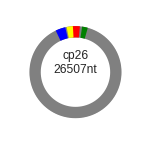

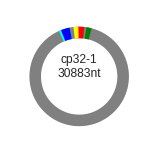

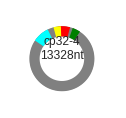

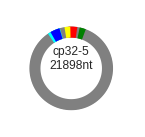

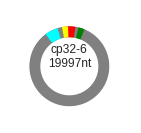

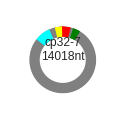

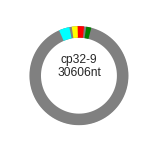

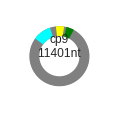

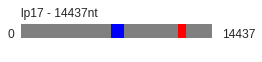

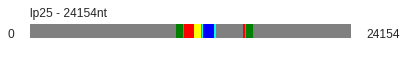

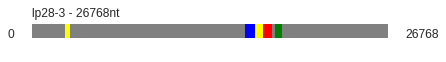

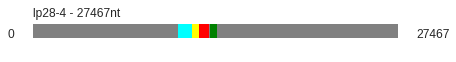

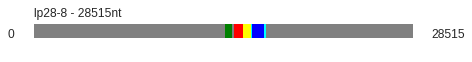

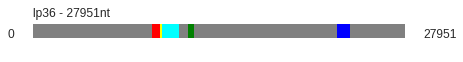

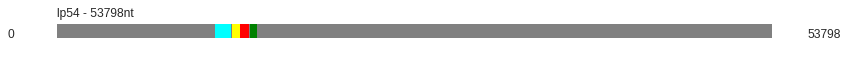

In [ ]:
## Use matplotlib to draw the plasmids in replicons.fna / output.txt.
import sys
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
from Bio import SeqIO

# -------- Begin constants -------- #

# Colors
BASE_COLOR = 'gray'
SEQUENCE_COLORS = {32: 'red', 49: 'green', 50: 'yellow', 57: 'cyan', 62: 'blue'}

# Linear plot
BASE_LINE_WIDTH = 15
SEQUENCE_LINE_WIDTH = 20
MARKER_LINE_WIDTH = 15
HORIZONTAL_SCALE_CONSTANT = 1/4000
# Offsets to avoid labels intersecting plot
LABEL_Y_ADJUST = 0.005
LABEL_LEFT_X_ADJUST = 0.07
LABEL_RIGHT_X_ADJUST = 0.05

# Circular plot
CHART_BOTTOM = 8
CHART_THICKNESS = 4.5  ## Was 1.5
CIRCULAR_SCALE_CONSTANT = 1  ## Was 3

# -------- End constants -------- #

# -------- Begin functions -------- #

def file_length(file):
    with open(file) as f:
        for i, l in enumerate(f):
            pass
    return i + 1


def linear_plot(data):
    # Scaling
    horizontal_scale = plasmid_length * HORIZONTAL_SCALE_CONSTANT
    plt.figure()
    plt.rcParams['figure.figsize'] = (horizontal_scale, 0.5)
    plt.close('all')  
    
    linear = plt.subplot(111)
    linear.set_facecolor('white')
    background = linear.barh(0, plasmid_length, height = 20, color = 'white')
    baseline = linear.barh(0, plasmid_length, height = 1, color = BASE_COLOR)
    
    for index in range(2, data_count):
        sequence = data[index]
        # Get sequence data
        sequence_start = min(sequence[1], sequence[2])
        sequence_end = max(sequence[1], sequence[2])
        sequence_length = sequence_end - sequence_start
        sequence_family = sequence[0]

        # Plot gene onto plasmid
        color = SEQUENCE_COLORS[sequence_family]
        gene_plot = linear.barh(0, sequence_length, left = sequence_start, height = 1, color = color)
    
    # Add labels
    label_y = 0
    # Left side label - name of plasmid (second column)
    label_x = -plasmid_length * LABEL_LEFT_X_ADJUST
    if plasmid_length < 10000:
        label_x *= 2
    plt.text(label_x, label_y, "0")
    # Right side label - length of plasmid
    label_x = plasmid_length + plasmid_length * LABEL_RIGHT_X_ADJUST
    plt.text(label_x, label_y, str(plasmid_length))
    # Top label - plasmid name
    label_x = 0
    label_y = 0.8
    label_text = str(sequence_name) + " - " + str(plasmid_length) + "nt"
    plt.text(label_x, label_y, label_text)
    
    # Fix axes limits
    xmin, xmax, ymin, ymax = plt.axis('tight')
    plt.ylim(0, 1)
    
    # Hide background and show plot
    plt.axis('off')
    plt.show()


def circular_plot(data):
    # Sizing
    graph_scale = np.sqrt(plasmid_length/9000) * CIRCULAR_SCALE_CONSTANT
    circle_width = CHART_THICKNESS/graph_scale * CIRCULAR_SCALE_CONSTANT
    circle_bottom = CHART_BOTTOM
    plt.figure()
    plt.rcParams['figure.figsize'] = (graph_scale, graph_scale)
    plt.close('all')
    
    circle = plt.subplot(111, polar=True)
    circle.set_theta_offset(np.radians(90)) # Move origin to top instead of right
    baseline = circle.bar(0, circle_width, width = -np.radians(360), bottom = circle_bottom, align='edge', color = BASE_COLOR)
    
    # Use data from first protein family sequence for initial minimum/maximum values
    first_data_point = data[2]
    minimum = min(first_data_point[1], first_data_point[2])
    maximum = max(first_data_point[1], first_data_point[2])
    
    # Center the plot
    for index in range(2, data_count):
        sequence = data[index]
        sequence_start = min(sequence[1], sequence[2])
        sequence_end = max(sequence[1], sequence[2])
        if sequence_start < minimum:
            minimum = sequence_start
        if sequence_end > maximum:
            maximum = sequence_end
    
    center = (minimum + maximum)/2
    
    # Plot
    for index in range(2, data_count):
        sequence = data[index]
        # Get sequence data
        sequence_start = min(sequence[1], sequence[2])
        sequence_end = max(sequence[1], sequence[2])
        sequence_length = sequence_end - sequence_start
        sequence_family = sequence[0]

        # Plot gene onto plasmid
        gene_plot_start = ((center - sequence_start) / plasmid_length) * np.radians(360)
        gene_plot_width = (sequence_length / plasmid_length) * np.radians(360)
        color = SEQUENCE_COLORS[sequence_family]
        gene_plot = circle.bar(gene_plot_start, circle_width, width = gene_plot_width, bottom = circle_bottom, color = color)
    
    # Label - plasmid name and length
    label_x = 0
    label_y = 0 ## Was 0
    label_text = str(sequence_name) + "\n" + str(plasmid_length) + "nt"
    plt.text(label_x, label_y, label_text, ha = 'center')
    
    # Hide background and show plot
    plt.axis('off')
    plt.show()


# -------- End functions -------- #

# -------- Begin main program -------- #

plasmid_type = 'l'
plasmid_length = 56000
data_dict = {}
line_number = 0

## Get sequence length of each record in "replicons.fna"
replen = {}
with open('replicons.fna', 'r') as fna: 
    for rec in SeqIO.parse(fna, 'fasta'):
        replen[rec.id] = len(rec.seq)  ## replen['lp17'] = 17000
        

# Create dictionary from FASTA output
filename = 'output.txt'
with open(filename) as data:
    for line in islice(data, 0, file_length(filename)):
        line_number += 1
        plasmid = line.split()[0]
        
        # If sequence does not exist in dictionary, initialize with the plasmid type and length
        if plasmid not in data_dict:
            plasmid_length = replen[plasmid]
            data_dict[plasmid] = [plasmid_type, plasmid_length]
        
        # Pull data from relevant columns in FASTA output
        pf = int(line.split()[1])
        start = min(int(line.split()[6]), int(line.split()[7]))
        end = max(int(line.split()[6]), int(line.split()[7]))
        
        value_cleared = True
        
        # Check to see if overlaps with another sequence
        for tuple_index in range(2, len(data_dict[plasmid])):
            ranges = data_dict[plasmid][tuple_index]
            
            # Test for overlap with previously added sequences
            #if (start > ranges[1] and start < ranges[2]) or (end > ranges[1] and end < ranges[2]):
            #    print("Overlap at line " + str(line_number) + " of input. Skipped following data from sequence " 
            #          + plasmid + ": Family " + str(pf) + " between " 
            #          + str(start) + " and " + str(end) + ".")
            #    value_cleared = False
            #    break
        
        # If no overlap, add data point to value in dictionary for plasmid key
        if value_cleared:
            pf_tuple = (pf, start, end)
            data_dict[plasmid].append(pf_tuple)

# Loops over every key in dictionary and creates a plot for each
for plasmid, data in data_dict.items():
    sequence_name = plasmid
    plasmid_type = data[0]
    plasmid_length = data[1]
    data_count = len(data)
    if ('cp' in plasmid):
        circular_plot(data)
    else:
        linear_plot(data)
